In [3]:
pip install Faker


Note: you may need to restart the kernel to use updated packages.


In [38]:
import sqlite3
from faker import Faker
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
fake = Faker()
faker = Faker('es_ES')
data = []


In [6]:
cnx = sqlite3.connect("bdd_testing.db") #CONEXION BDD
cursor = cnx.cursor()

In [81]:
#A.1 - Carga Dataset
ruta_xml = r"C:\Users\segur\Desktop\Data Science SL - The Bridge Repositorios\ONLINE_DS_THEBRIDGE_SL\Proyecto_EDA\SCR\SCR DATA\datos_ocupacion\occupancy_report_full.xlsx"


In [98]:
# A.1 - Leer el archivo con Libreria Pandas
df = pd.read_excel(ruta_xml)
df.head()


,AÑO,MES,TIPO_PERSONAL,DIA,OCUPACION,DIA SEMANA,HORA ACCESO
0,2023,3,EXTERNO,2023-03-01,72,miércoles,NaN
1,2023,3,INTERNO,2023-03-01,392,miércoles,NaN
2,2023,3,EXTERNO,2023-03-02,79,jueves,NaN
3,2023,3,INTERNO,2023-03-02,409,jueves,NaN
4,2023,3,EXTERNO,2023-03-03,71,viernes,NaN


In [99]:
#A.2 - Identificacion de errores en dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AÑO            1220 non-null   int64         
 1   MES            1220 non-null   int64         
 2   TIPO_PERSONAL  1220 non-null   object        
 3   DIA            1220 non-null   datetime64[ns]
 4   OCUPACION      1220 non-null   int64         
 5   DIA SEMANA     1220 non-null   object        
 6   HORA ACCESO    0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 66.8+ KB


In [ ]:
#A.2 - Descripcion de valores 

df.describe()

,AÑO,MES,DIA,OCUPACION,HORA ACCESO
count,1220.000000,1220.000000,1220,1220.000000,0.0
mean,2023.607377,6.686885,2024-02-14 03:45:26.557377280,152.480328,NaN
min,2023.000000,1.000000,2023-03-01 00:00:00,1.000000,NaN
25%,2023.000000,4.000000,2023-08-22 00:00:00,46.000000,NaN
50%,2024.000000,7.000000,2024-02-14 12:00:00,79.000000,NaN
75%,2024.000000,10.000000,2024-08-08 06:00:00,197.250000,NaN
max,2025.000000,12.000000,2025-01-31 00:00:00,1073.000000,NaN
std,0.572069,3.379763,NaN,171.102554,NaN


In [ ]:
df["OCUPACION"].describe()      
#Tenemos valores interesantes como OCUPACION MAXIMA de 1073 personas

count    1220.000000
mean      152.480328
std       171.102554
min         1.000000
25%        46.000000
50%        79.000000
75%       197.250000
max      1073.000000
Name: OCUPACION, dtype: float64

In [96]:
#Limpieza de Data 
# Verificar tipos, nulos y duplicados
df["DIA"] = pd.to_datetime(df["DIA"], dayfirst=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AÑO            1220 non-null   int64         
 1   MES            1220 non-null   int64         
 2   TIPO_PERSONAL  1220 non-null   object        
 3   DIA            1220 non-null   datetime64[ns]
 4   OCUPACION      1220 non-null   int64         
 5   DIA SEMANA     1220 non-null   object        
 6   HORA ACCESO    0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 66.8+ KB


In [100]:
#Eliminamos la hora de acceso todos los datos salieron mal de la BDD. 
print(df.isnull().sum())
print("Duplicados:", df.duplicated().sum())

AÑO                 0
MES                 0
TIPO_PERSONAL       0
DIA                 0
OCUPACION           0
DIA SEMANA          0
HORA ACCESO      1220
dtype: int64
Duplicados: 0


In [101]:
#Eliminamos la hora de acceso porque todos los datos estan mal
df.drop("HORA ACCESO", axis=1, inplace=True)
df

,AÑO,MES,TIPO_PERSONAL,DIA,OCUPACION,DIA SEMANA
0,2023,3,EXTERNO,2023-03-01,72,miércoles
1,2023,3,INTERNO,2023-03-01,392,miércoles
2,2023,3,EXTERNO,2023-03-02,79,jueves
3,2023,3,INTERNO,2023-03-02,409,jueves
4,2023,3,EXTERNO,2023-03-03,71,viernes
...,...,...,...,...,...,...
1215,2025,1,INTERNO,2025-01-29,426,miércoles
1216,2025,1,EXTERNO,2025-01-30,71,jueves
1217,2025,1,INTERNO,2025-01-30,594,jueves
1218,2025,1,EXTERNO,2025-01-31,64,viernes


In [ ]:
#Analisis Exploratorio de Data 

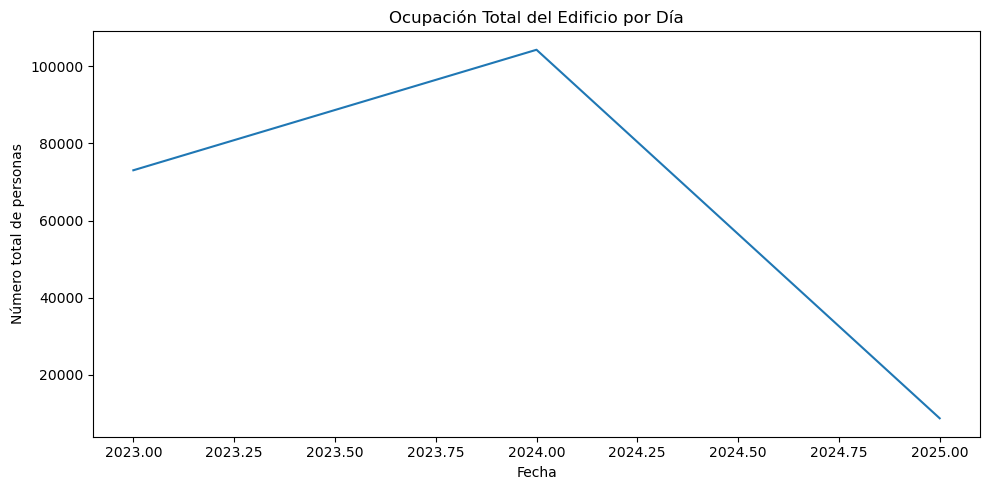

In [111]:
ocupacion_anual = df.groupby("AÑO")["OCUPACION"].sum().reset_index()

# Graficar 
plt.figure(figsize=(10, 5))
sns.lineplot(data=ocupacion_anual, 
             x="AÑO", 
             y="OCUPACION")

plt.title("Ocupación Total del Edificio por Día")
plt.xlabel("Fecha")
plt.ylabel("Número total de personas")

plt.tight_layout()
plt.show()



### **Insight 1**: de 2023 a 2024 el personal que acudio a la oficina aumento un porcentaje considerable. 

In [103]:
ocupacion_diaria = df.groupby("AÑO")["OCUPACION"].sum().reset_index()
ocupacion_diaria


,AÑO,OCUPACION
0,2023,73034
1,2024,104290
2,2025,8702


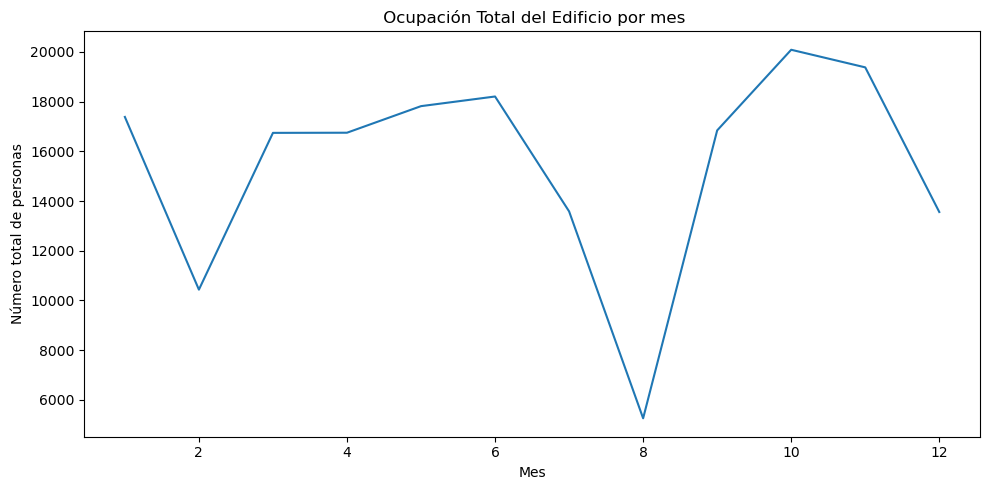

In [ ]:
ocupacion_diaria = df.groupby("MES")["OCUPACION"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=ocupacion_diaria, 
             x="MES", 
             y="OCUPACION")

plt.title(" Ocupación Total del Edificio por mes")
plt.xlabel("Mes")
plt.ylabel("Número total de personas")

plt.tight_layout()
plt.show()



### **Insight 2** : EL MES 2 ES UN MES DEBIL DE ACCESOS Y PERSONAL PRESENCIAL, PERO EL MES 8 ES DEVASTADOR. ¿CONVIENE ABRIR EL EDIFICIO ESE MES?

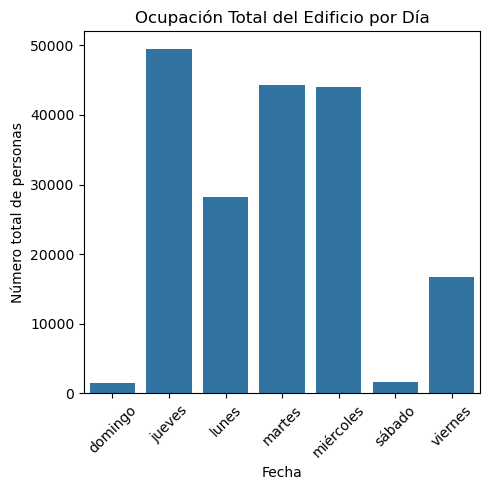

In [ ]:
ocupacion_diaria = df.groupby("DIA SEMANA")["OCUPACION"].sum().reset_index()

plt.figure(figsize=(5, 5))

sns.barplot(data=ocupacion_diaria, 
             x="DIA SEMANA", 
             y="OCUPACION",)


plt.title("Ocupación Total del Edificio por Día")
plt.xlabel("Fecha")
plt.ylabel("Número total de personas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Insight 3** : Como vemos hay una disminucion gigante los fines de semana (donde hay personal minimo) pero los dias VIERNES no viene ni la mitad de los empleados que vienen el dia JUEVES por ejemplo. 

In [ ]:
ocupacion_diaria = df.groupby("DIA SEMANA")["OCUPACION"].sum().reset_index()


,DIA SEMANA,OCUPACION
0,domingo,1528
1,jueves,49522
2,lunes,28218
3,martes,44312
4,miércoles,43979
5,sábado,1697
6,viernes,16770


### **Insight 4** : Como seran los dias VIERNES en el MES de AGOSTO donde tenemos una bajada gigante?

In [ ]:
ocupacion_diaria = df.groupby("DIA SEMANA")["OCUPACION"].sum().reset_index()

# Plot
plt.figure(figsize=(5, 5))

sns.barplot(data=ocupacion_diaria, 
             x="DIA SEMANA", 
             y="OCUPACION",)


plt.title("Ocupación Total del Edificio por Día")
plt.xlabel("Fecha")
plt.ylabel("Número total de personas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

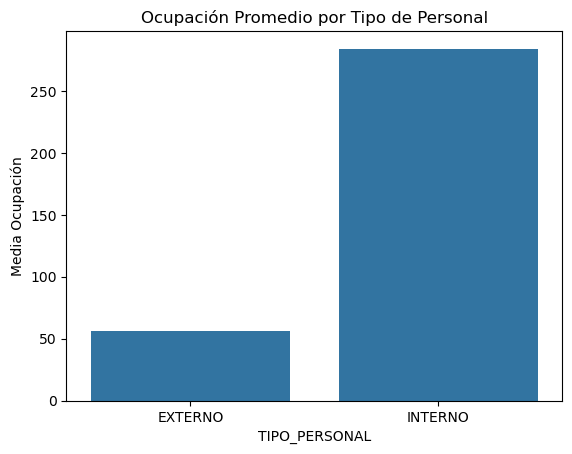

In [107]:
# Ocupación promedio por tipo de personal 
personal = df.groupby("TIPO_PERSONAL")["OCUPACION"].mean().reset_index()

sns.barplot(data=personal,
            x="TIPO_PERSONAL", 
            y="OCUPACION")

plt.ylabel("Media Ocupación")
plt.title("Ocupación Promedio por Tipo de Personal")
plt.show()


In [108]:
df.groupby(["MES", "TIPO_PERSONAL"])["OCUPACION"].mean()


MES  TIPO_PERSONAL
1    EXTERNO           56.854839
     INTERNO          307.933333
2    EXTERNO           65.482759
     INTERNO          388.000000
3    EXTERNO           58.967742
     INTERNO          297.386364
4    EXTERNO           60.650000
     INTERNO          278.893617
5    EXTERNO           58.354839
     INTERNO          330.186047
6    EXTERNO           62.383333
     INTERNO          314.369565
7    EXTERNO           52.032258
     INTERNO          225.152174
8    EXTERNO           41.919355
     INTERNO           57.847826
9    EXTERNO           55.766667
     INTERNO          299.866667
10   EXTERNO           59.322581
     INTERNO          334.816327
11   EXTERNO           59.500000
     INTERNO          351.244444
12   EXTERNO           47.285714
     INTERNO          278.394737
Name: OCUPACION, dtype: float64

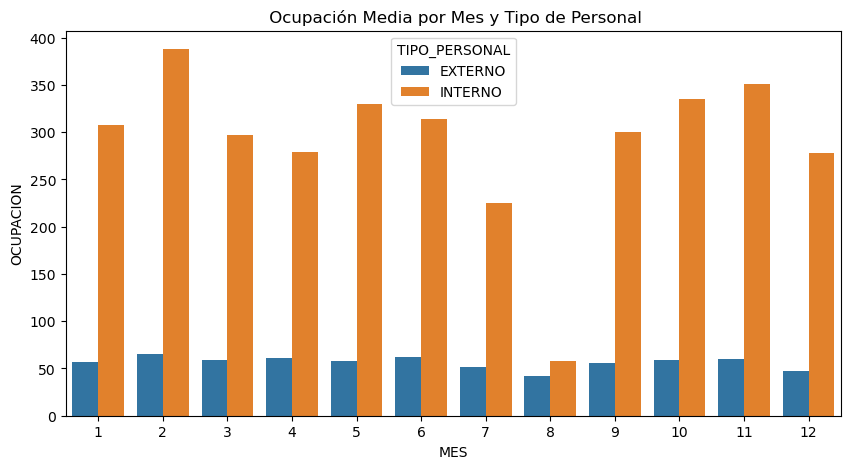

In [ ]:
media_mes =df.groupby(["MES", "TIPO_PERSONAL"])["OCUPACION"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=media_mes,
            x="MES",
            y="OCUPACION", 
            hue="TIPO_PERSONAL")

plt.title(" Ocupación Media por Mes y Tipo de Personal")
plt.show()

# Conclusiones
- Identificamos días de baja ocupación que podrían permitir optimizar recursos.
- Se observa una diferencia notable entre personal interno y externo.
- La ocupación es más baja los viernes y en ciertos meses.

### Recomendaciones
- Implementar días de teletrabajo (viernes).
- Reducir climatización y limpieza en días de baja ocupación.
- Explorar la posibilidad de cerrar plantas o servicios parcialmente.


c:\Users\segur\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


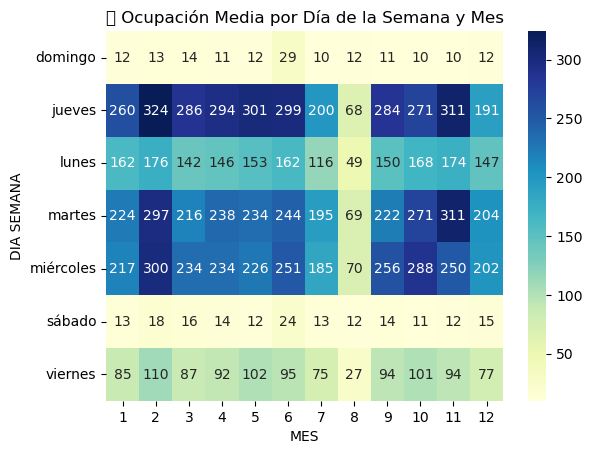

In [79]:
heatmap_df = df.groupby(["DIA SEMANA", "MES"])["OCUPACION"].mean().unstack()
sns.heatmap(heatmap_df, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("🗓️ Ocupación Media por Día de la Semana y Mes")
plt.show()

c:\Users\segur\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


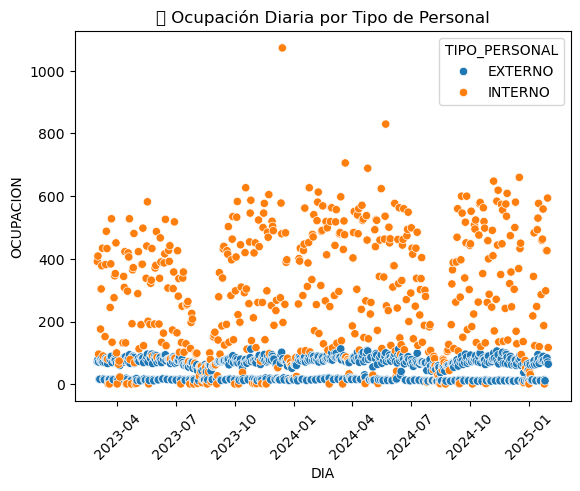

In [80]:
sns.scatterplot(data=df, x="DIA", y="OCUPACION", hue="TIPO_PERSONAL")
plt.title("🧭 Ocupación Diaria por Tipo de Personal")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Configuración de generación
n_personas = 40000
dias_laborales = pd.date_range(start="2023-03-01", end="2025-01-01", freq="B")  # solo días hábiles

# Datos base
nombres = ["PEDRO", "LUCIA", "MARTA", "JUAN", "CARLOS", "ANDREA", "SOFIA", "RAUL", "JORGE", "MARIA"]
apellidos = ["PASCAL", "RAMIREZ", "RODRIGUEZ", "GOMEZ", "DIAZ", "FERNANDEZ", "TORRES", "MARTINEZ", "LOPEZ", "NAVARRO"]
departamentos = {
    "IT": 2,
    "FINANZAS": 5,
    "RRHH": 3,
    "LEGAL": 4,
    "LOGISTICA": 1,
    "OPERACIONES": 6
}
tipo_personal = ["INTERNO", "EXTERNO"]

# Generar registros
registros = []
for i in range(n_personas):
    id_persona = random.randint(10000, 99999)
    nombre = random.choice(nombres)
    apellido = random.choice(apellidos)
    tipo = random.choice(tipo_personal)
    dpto = random.choice(list(departamentos.keys()))
    piso = departamentos[dpto]
    dias_trabajo = random.sample(list(dias_laborales), k=random.randint(2, 6))
    
    for dia in dias_trabajo:
        registros.append([
            id_persona, nombre, apellido, tipo, dpto, piso, dia.date()
        ])

# Crear DataFrame
df_personal = pd.DataFrame(registros, columns=[
    "ID", "NOMBRE", "APELLIDO", "PERSONAL", "DEPARTAMENTO", "PISO_TRABAJO", "DIA_TRABAJO"
])


In [191]:
for i in range(10):
    id_operacion = random.randint(1000, 2500)
    id_proveedor = random.randint(101, 125)
    id_pieza = random.randint(1, 35)
    id_factura = random.randint(5000, 5050)
    fecha = fake.date_this_decade().isoformat()
    data.append((id_operacion, id_proveedor, id_pieza, fecha, id_factura))

In [192]:
df_operaciones = pd.DataFrame(data, columns=['id_operacion', 'id_proveedor', 'id_pieza', 'fecha', 'id_factura'])
df_operaciones

,id_operacion,id_proveedor,id_pieza,fecha,id_factura
0,2216,114,11,2021-12-30,5037
1,1526,121,22,2024-07-23,5000
2,1295,110,17,2024-02-25,5001
3,1952,120,28,2025-04-09,5049
4,1229,124,33,2022-04-01,5004
5,2289,116,11,2024-07-30,5036
6,1201,110,7,2021-12-17,5021
7,1184,109,7,2025-04-09,5012
8,2111,109,31,2024-02-27,5039
9,1230,109,6,2024-06-09,5039


In [193]:
    cursor.execute("DROP TABLE IF EXISTS operaciones")

 
    cursor.execute("""
    CREATE TABLE operaciones (
        id_operacion INTEGER PRIMARY KEY,
        id_proveedor INTEGER,
        id_pieza INTEGER,
        fecha TEXT,
        id_factura INTEGER
    )
    """)

In [194]:
df_operaciones.to_sql('operaciones', cnx, if_exists='append', index=False)
print("\nDatos cargados correctamente en bdd_new.db.")


Datos cargados correctamente en bdd_new.db.


In [199]:
#PRUEBA DE QUE FUNCIONA 

query = ''' 
SELECT *
FROM operaciones
WHERE id_factura > 5010
'''
pd.read_sql(query, cnx)

,id_operacion,id_proveedor,id_pieza,fecha,id_factura
0,1184,109,7,2025-04-09,5012
1,1201,110,7,2021-12-17,5021
2,1230,109,6,2024-06-09,5039
3,1952,120,28,2025-04-09,5049
4,2111,109,31,2024-02-27,5039
5,2216,114,11,2021-12-30,5037
6,2289,116,11,2024-07-30,5036


In [187]:
cnx.close() #CIERRE CONEXTION

In [ ]:
with sqlite3.connect("bdd_testing.db") as cnx: #CHECK BDD
    cursor = cnx.cursor()